# Imports 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import regex as re
import matplotlib.pyplot as plt

# Functions

In [2]:
def remove_sp_char(df,col):
    df[col] = df[col].replace(r'[^0-9]', '', regex=True).astype('int64')
    return df

In [3]:
def fill_na_backfill(df,col):
    df[col] = df[col].fillna(method='bfill')
    return df

In [4]:
used_cars = pd.read_csv('used_cars.csv')

In [5]:
used_cars.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [6]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [7]:
used_cars.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


# Percentage of null values in each column

In [8]:
null_percentage = used_cars.isnull().mean()*100

In [9]:
null_percentage

brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        4.240459
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         2.818658
clean_title     14.866550
price            0.000000
dtype: float64

# Converting price to int and removing special characters

In [10]:
used_cars = remove_sp_char(used_cars,'price')

In [11]:
used_cars = remove_sp_char(used_cars,'milage')

In [12]:
used_cars = fill_na_backfill(used_cars,'fuel_type')

In [13]:
used_cars = fill_na_backfill(used_cars,'accident')

In [14]:
# can remove data for not supported fuel type
used_cars['fuel_type'].value_counts()

fuel_type
Gasoline          3458
Hybrid             205
E85 Flex Fuel      142
Diesel             119
–                   49
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

# Converting accidet and clean_title to binary values columns

In [15]:
#converting accident to 1 and 0 

In [16]:
used_cars.loc[used_cars['accident'] == 'None reported','accident'] = 0

In [17]:
used_cars.loc[used_cars['accident'] == 'At least 1 accident or damage reported','accident'] = 1

In [18]:
used_cars['accident'].value_counts()

accident
0    3001
1    1008
Name: count, dtype: int64

In [19]:
#Converting clean_title to 1 and 0

In [20]:
used_cars.loc[used_cars['clean_title'] == 'Yes','clean_title'] = 1

In [21]:
used_cars['clean_title'] = used_cars['clean_title'].fillna(0)

In [22]:
used_cars['clean_title'].value_counts()

clean_title
1    3413
0     596
Name: count, dtype: int64

# Visualization of corrleation between clean_title and price

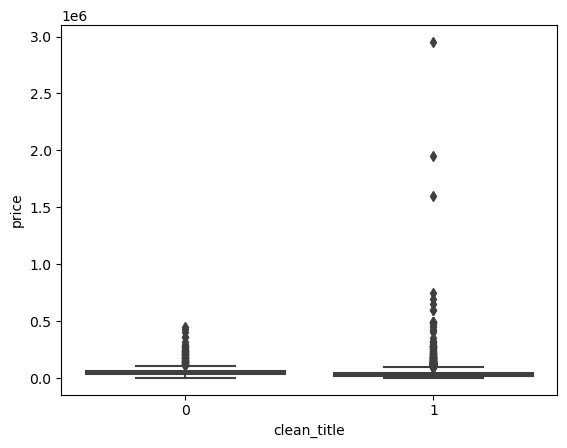

In [23]:
sns.boxplot(x='clean_title', y='price', data=used_cars)
plt.show()

In [24]:
#drop these rows
used_cars[(used_cars['price'] > 1500000) & (used_cars['clean_title'] == 1)]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
229,Bugatti,Veyron 16.4 Grand Sport,2011,6330,Gasoline,8.0L W16 64V GDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,White,White,0,1,1950995
693,Maserati,Quattroporte Base,2005,32000,Gasoline,394.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Red,Beige,1,1,2954083
3046,Porsche,Carrera GT Base,2005,4400,Gasoline,605.0HP 5.7L 10 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,0,1,1599000


In [25]:
# Dropping rows where 'price' is greater than 250000
used_cars.drop(used_cars[(used_cars['price'] > 1500000) & (used_cars['clean_title'] == 1)].index, inplace=True)

# Visualization of corrleation between accident and price

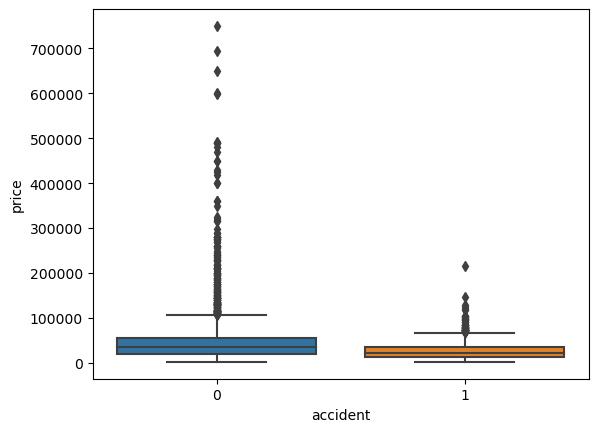

In [26]:
sns.boxplot(x='accident', y='price', data=used_cars)
plt.show()

In [27]:
#drop this row
used_cars[(used_cars['price'] > 1000000) & (used_cars['accident'] == 1)]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


In [28]:
#drop these rows
used_cars[(used_cars['price'] > 1500000) & (used_cars['accident'] == 0)]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


# Visualization of corrleation between milage and price

Text(0, 0.5, 'price')

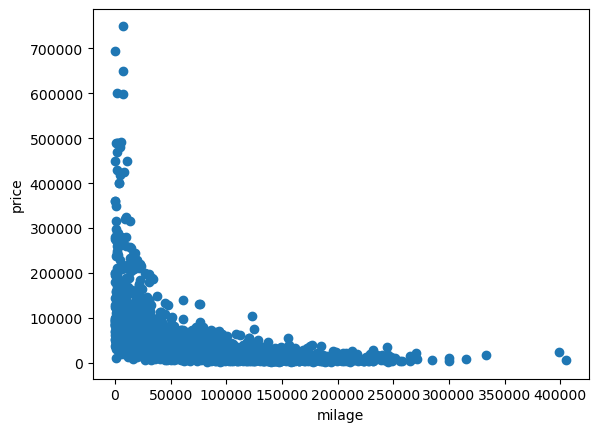

In [29]:
plt.scatter(used_cars['milage'],used_cars['price'])
plt.xlabel('milage')
plt.ylabel('price') 

In [30]:
#drop these rows
used_cars[(used_cars['milage']<50000) & (used_cars['price']>1500000)]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


In [31]:
used_cars.to_csv('used_cars_data.csv', index=False)